Where dataframe is found:
https://www.kaggle.com/datasets

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid', font = 'SimHei', font_scale = 1.5, rc = {'axes.unicode_minus': False})

1.Adjustment and Modification

In [20]:
fifa = pd.read_csv('https://raw.githubusercontent.com/sophhhie/homework/master/fifa19.csv')
fifa.columns
columns = ['Name', 'Age', 'Nationality','Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight',  'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']
fifa.dropna(axis = 0, inplace = True)
fifa.dropna(axis = 1, inplace = True)
fifa.drop_duplicates(inplace = True)
fifa = pd.read_csv('https://raw.githubusercontent.com/sophhhie/homework/master/fifa19.csv',usecols = columns)
fifa.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [21]:
# delete currency symbol
fifa['Wage'] = fifa['Wage'].str[1:-1]
pd.to_numeric(fifa['Wage'], errors = 'coerce')

0        565.0
1        405.0
2        290.0
3        260.0
4        355.0
         ...  
18202      1.0
18203      1.0
18204      1.0
18205      1.0
18206      1.0
Name: Wage, Length: 18207, dtype: float64

2.Is Left-foot Player more talented?

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64


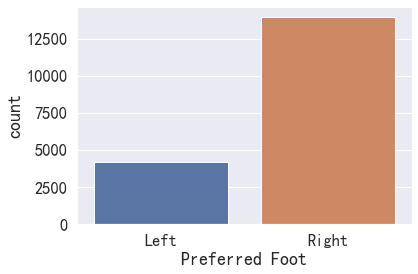

In [22]:
# overview
total = fifa['Preferred Foot'].value_counts()
print(total)
sns.countplot(x = 'Preferred Foot',data = fifa)

In [23]:
# distribution of foot-using among positions
t = fifa.groupby(['Preferred Foot', 'Position']).size()
t = t.unstack()
t[t < 50] = np.NaN
t.dropna(axis = 1, inplace = True)
display(t)
# Backline more left guys

Position,CAM,CB,CDM,CM,GK,LB,LCB,LCM,LM,LW,RM,RW,ST
Preferred Foot,,,,,,,,,,,,,
Left,256,341,126,249,206,1163,264,97,412,109,252,97,293
Right,702,1437,822,1145,1819,159,384,298,683,272,872,273,1859


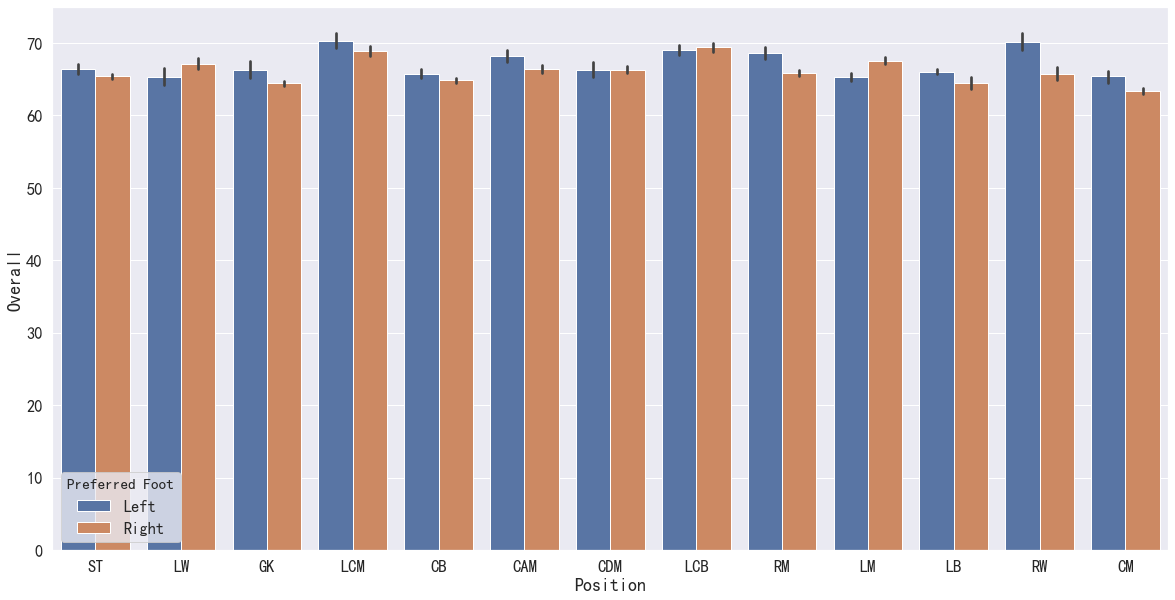

In [24]:
t2 = fifa[fifa['Position'].isin(t.columns)]
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Position', y = 'Overall', hue = 'Preferred Foot', hue_order = ['Left', 'Right'], data = t2)
# right wing leftguys outstanding, easily tangent shots can justify cauz efficent,e.g.,Arjen Robben.

3.BMI (Body Mass Index) and Overall Performence


In [25]:
# trans height and weight
fifa = fifa[fifa['Height'].notnull()]
def tran_height(height):
    v = height.split("'")
    return int(v[0]) * 30.48 + int(v[1]) * 2.54
fifa['Height'] = fifa['Height'].apply(tran_height)

In [26]:
def tran_weight(weight):
    v = int(weight.replace('lbs', ''))
    return v * 0.45
fifa['Weight'] = fifa['Weight'].apply(tran_weight)

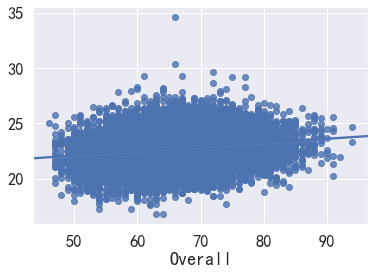

In [27]:
# calculate BMI, though all normal interval, but seems the higher BMI the better,cauz stronger muscle maybe)
bmi = fifa['Weight'] / (fifa['Height']/100) ** 2
sns.regplot(x = 'Overall', y = bmi, data = fifa);

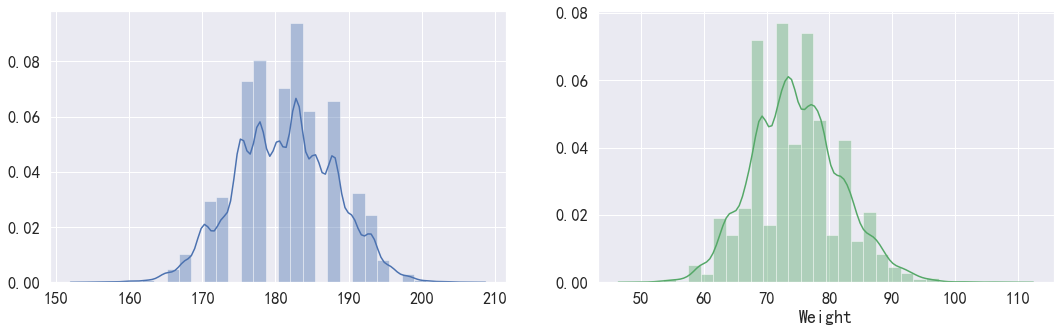

In [28]:
# density distribution
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((18, 5))
sns.distplot(fifa[['Height']], bins = 30, ax = ax[0], color = 'b')
sns.distplot(fifa['Weight'], bins = 30, ax = ax[1], color = 'g')

4.Age and Overall Performance

0.4530693185509342

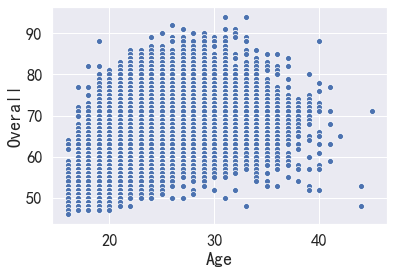

In [29]:
# scattering age and overall
sns.scatterplot(x = 'Age', y = 'Overall', data = fifa)
fifa['Age'].corr(fifa['Overall'])

In [30]:
# simplify the result above, below dim only 4 intervals for clearly display
min_, max_ = fifa['Age'].min() - 0.5, fifa['Age'].max()
pd.cut(fifa['Age'], bins = [min_, 20, 30, 40, max_])
a = pd.cut(fifa['Age'], bins = [min_, 20, 30, 40, max_], labels = ['teenage', 'young adulthood', 'mature', 'old'])
a = pd.concat((a, fifa['Overall']), axis = 1)
b = a.groupby('Age')
display(b['Overall'].mean())

Age
teenage            59.679723
young adulthood    67.375275
mature             69.375779
old                63.888889
Name: Overall, dtype: float64

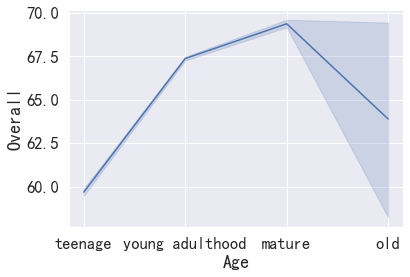

In [31]:
sns.lineplot(y = 'Overall',ms = 30, x = 'Age', data = a)

5.What Kind of Attributes explain more?

Text(0.5, 1.0, 'Correlation of Overall Performance with Factors')

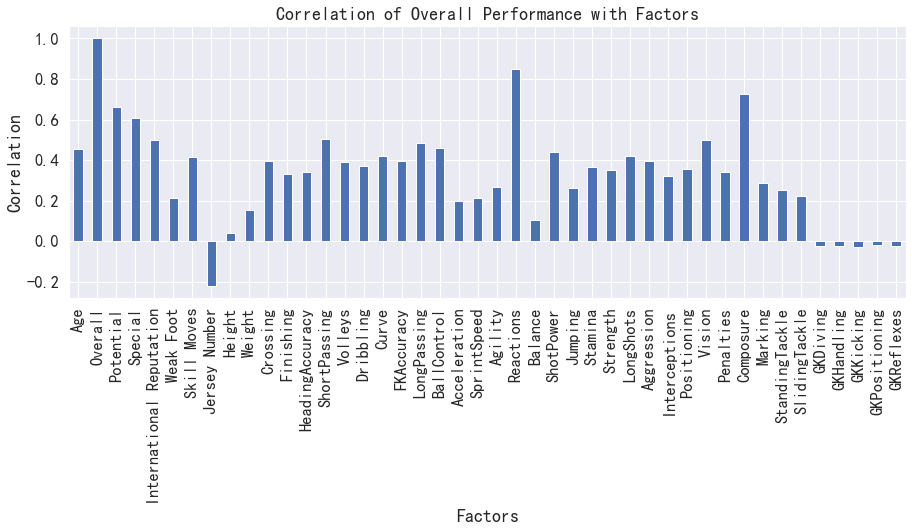

In [32]:
# bar display
c = fifa['Overall']
corr = fifa.corrwith(c)
plt.figure(figsize=(15,5))
corr.plot(kind = 'bar')
plt.xlabel('Factors')
plt.ylabel('Correlation')
plt.title('Correlation of Overall Performance with Factors')

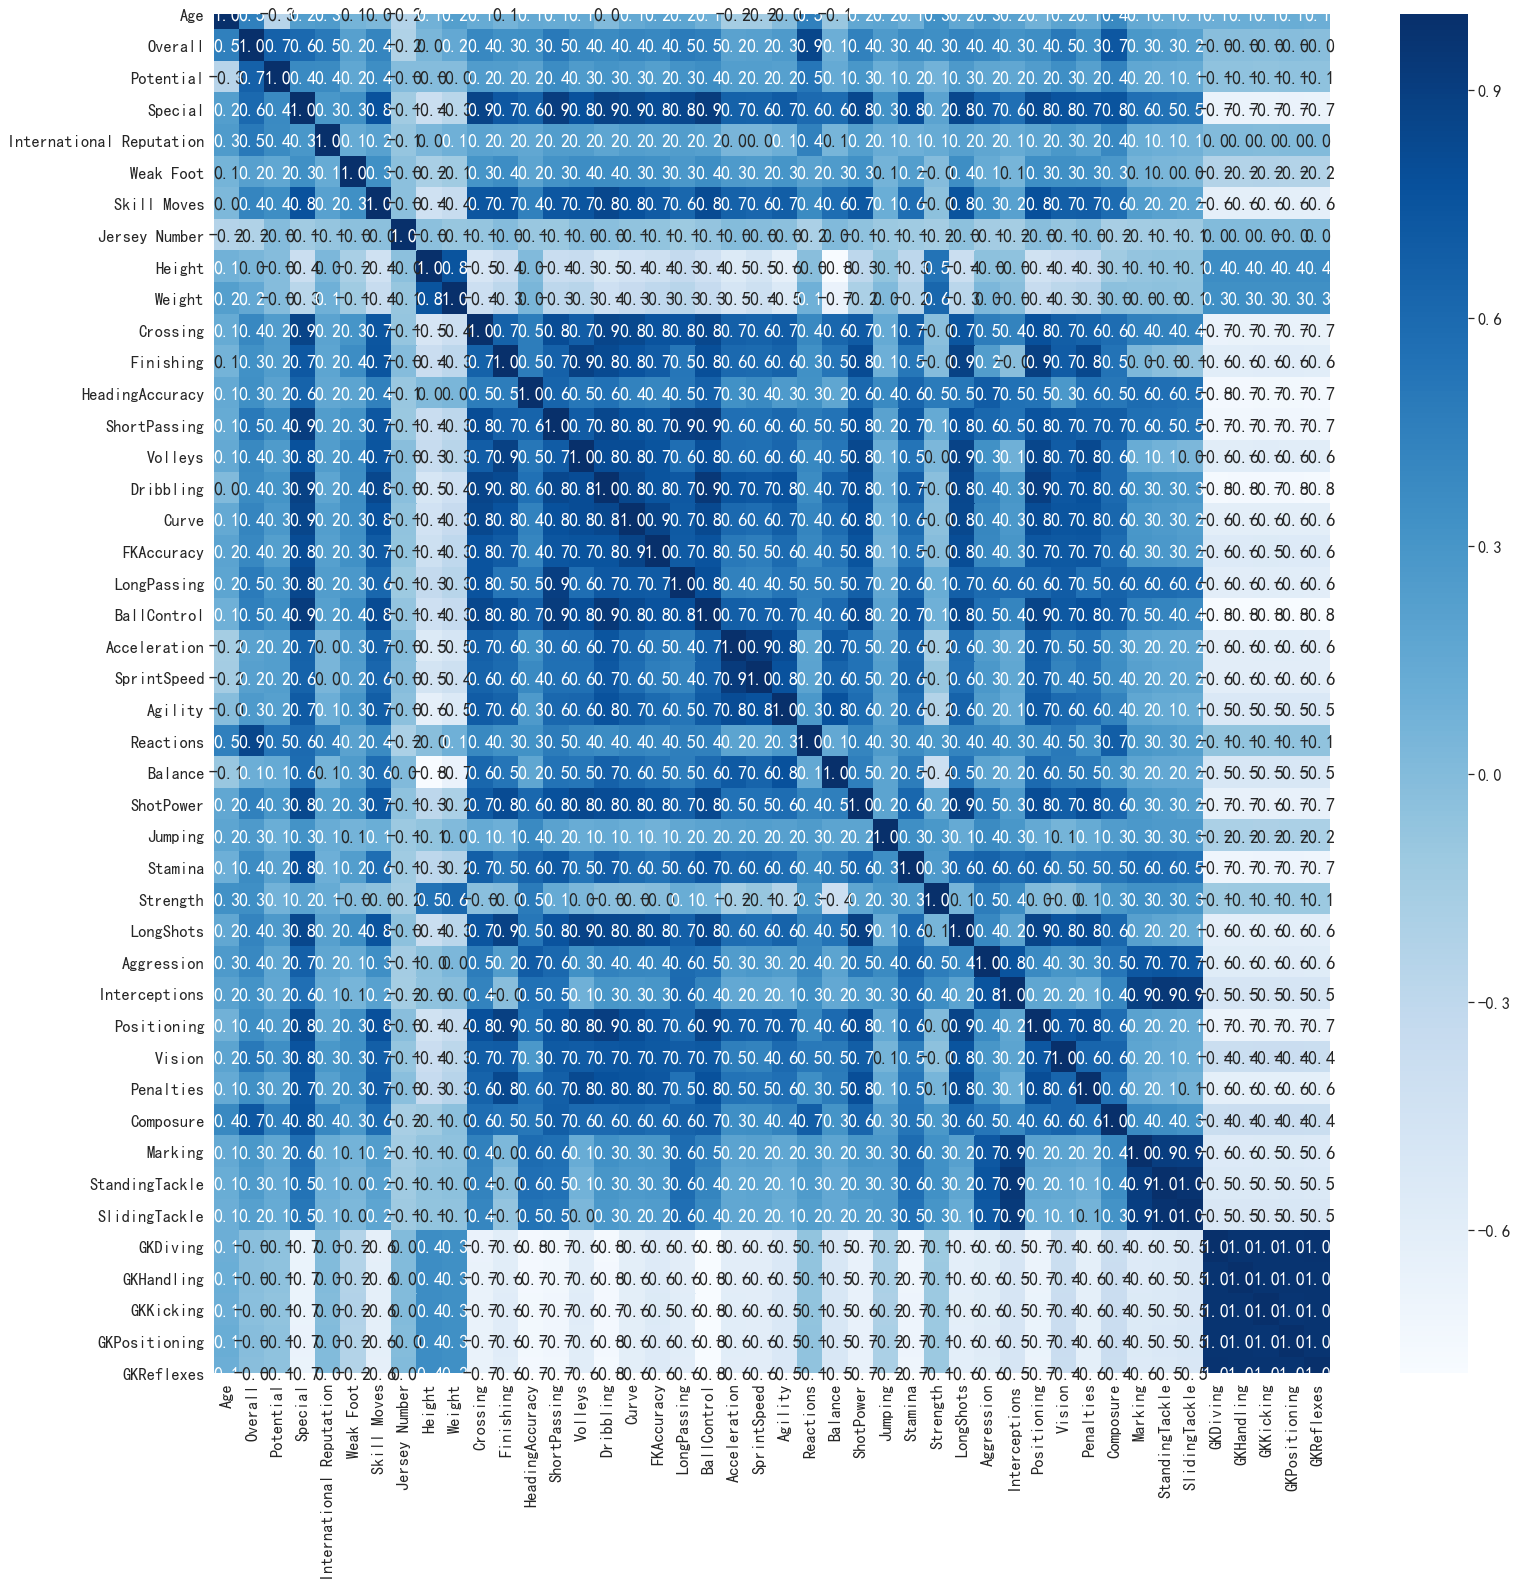

In [33]:
# heatmap and outstanding for composure and reaction
plt.figure(figsize = (25, 25))
sns.heatmap(fifa.corr(), annot = True, fmt = '.1f', cmap = plt.cm.Blues)

6.Something interesting about Jersey Number

Jersey Number  Position
1.0            GK          566
2.0            CAM           2
               CB           78
               CDM          10
               CM            5
                          ... 
99.0           RCM           1
               RM            3
               RW            1
               RWB           1
               ST           33
Length: 1306, dtype: int64

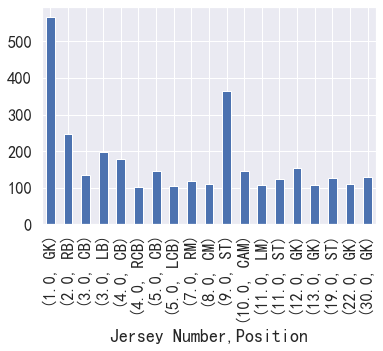

In [34]:
j = fifa.groupby(['Jersey Number', 'Position'])
k = j.size()
display(k)
k = k[k >= 100]
k.plot(kind = 'bar')
# boring GK always 1, striker and cornerbacker also some high coincidence

7.Are Strong Clubs Justified by Overalls?

In [35]:
e = fifa.groupby('Club')
f = e['Overall'].agg(['mean', 'count'])
# filter small clubs
f = f[f['count'] >= 20]
f = f.sort_values('mean', ascending = False).head(17)
display(f)

,mean,count
Club,,
Juventus,82.280000,25
Napoli,80.000000,25
Inter,79.750000,24
Real Madrid,78.242424,33
Milan,78.074074,27
FC Barcelona,78.030303,33
Paris Saint-Germain,77.433333,30
Roma,77.423077,26
Manchester United,77.242424,33


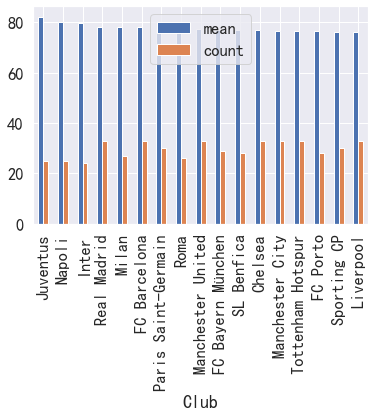

In [36]:
f.plot(kind = 'bar')